# Import modules

In [44]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# Load data

In [45]:
raw_data = pd.read_csv("dataset_SCL.csv", low_memory=False)
display(raw_data)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


# Inspect data

In [46]:
# Get dtypes and NaN count
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [48]:
# Copy raw_data and let it as backup
new_data = raw_data.copy()
# Convert time data to datetime
time_cols = ["Fecha-I","Fecha-O"]
for col in time_cols:
    try:
        new_data[col] = pd.to_datetime(raw_data[col])
    except:
        pass
# Get new dtypes
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [49]:
# Get basic statistics
new_data.describe(datetime_is_numeric=True)

,Fecha-I,Fecha-O,DIA,MES,AÑO
count,68206,68206,68206.000000,68206.000000,68206.000000
mean,2017-07-05 12:11:25.320059648,2017-07-05 12:20:31.971380992,15.714790,6.622585,2017.000029
min,2017-01-01 00:15:00,2017-01-01 00:04:00,1.000000,1.000000,2017.000000
25%,2017-03-31 12:41:15,2017-03-31 12:51:15,8.000000,3.000000,2017.000000
50%,2017-07-10 05:30:00,2017-07-10 05:37:00,16.000000,7.000000,2017.000000
75%,2017-10-08 11:18:45,2017-10-08 11:19:45,23.000000,10.000000,2017.000000
max,2017-12-31 23:55:00,2018-01-01 00:12:00,31.000000,12.000000,2018.000000
std,NaN,NaN,8.782886,3.523321,0.005415


# Questions

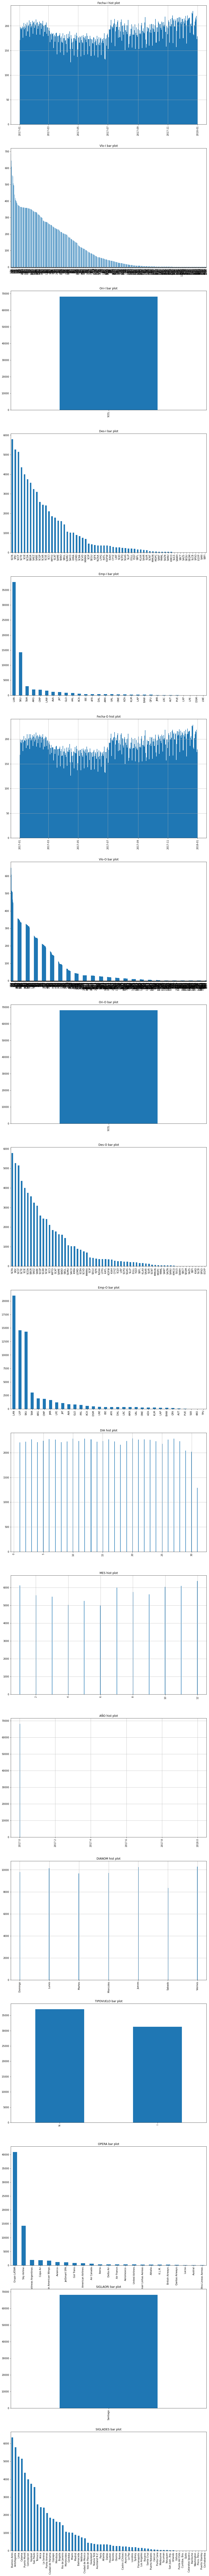

In [179]:
# Define list of plot type per column
plot_type_bycol = {
    'Fecha-I':'hist',
    'Vlo-I':'bar',
    'Ori-I':'bar',
    'Des-I':'bar',
    'Emp-I':'bar',
    'Fecha-O':'hist',
    'Vlo-O':'bar',
    'Ori-O':'bar',
    'Des-O':'bar',
    'Emp-O':'bar',
    'DIA':'hist',
    'MES':'hist',
    'AÑO':'hist',
    'DIANOM':'hist',
    'TIPOVUELO':'bar',
    'OPERA':'bar',
    'SIGLAORI':'bar',
    'SIGLADES':'bar'
}


fig, ax = plt.subplots(len(plot_type_bycol.items()),1, figsize=(15,200))
for ind, (col, p_type) in enumerate(plot_type_bycol.items()):
    try:
        ax[ind].set_title(f"{col} {p_type} plot")
        if p_type.lower()=='bar':
            new_data[col].value_counts().plot.bar(ax=ax[ind], rot=90)
        elif p_type.lower()=='hist':
            new_data[col].hist(ax=ax[ind], xrot=90, bins=365)  # For date, periodic drop (maybe Sunday(?))
        else:
            print('Error')
    except:
        pass

35


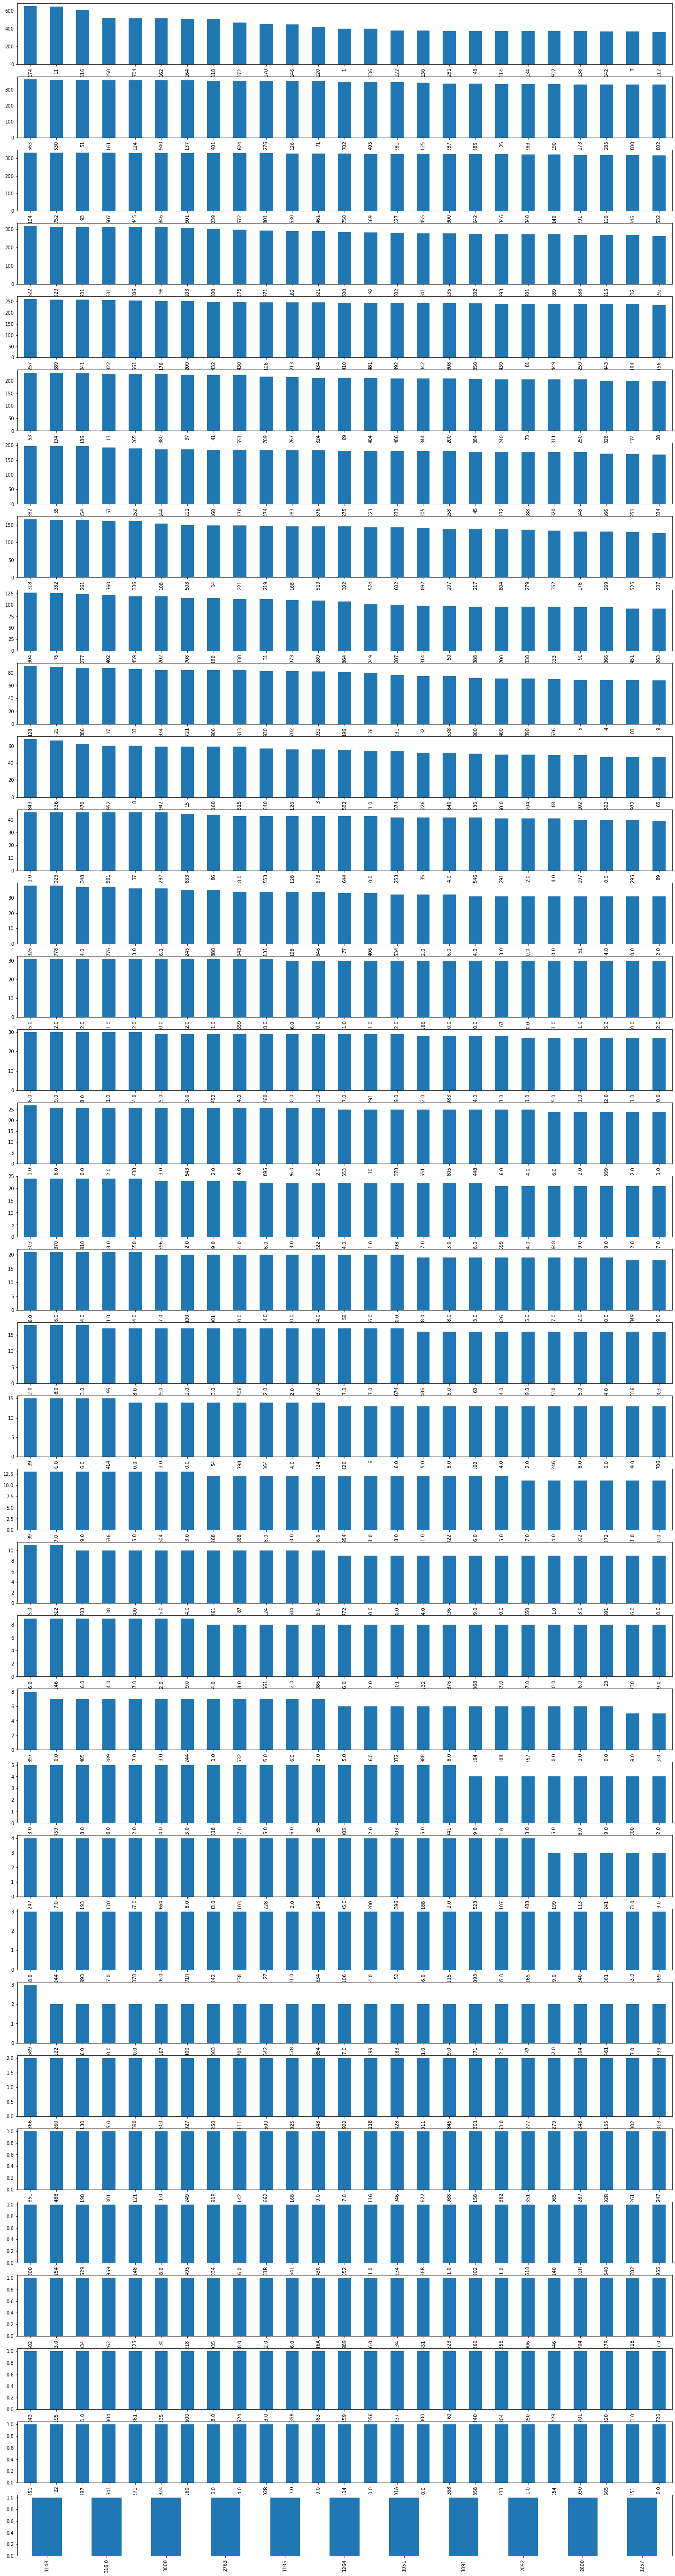

In [192]:
n_samples = 25
num_plots = int(len(new_data["Vlo-O"].value_counts())/n_samples)+1
fig, ax = plt.subplots(num_plots,1,figsize=(25,100))
for ind in range(num_plots):
    new_data["Vlo-O"].value_counts()[n_samples*(ind):n_samples*(ind+1)].plot.bar(ax=ax[ind], rot=90)
plt.show()

# Add columns of interest

 -Unique values of year are 2017, 2018
 
 -Explicar logica de temporada alta
 
 -Explicar que temporada alta corresponde a ~10% de vuelos totales
 
 -Ideas de modelos: LR, SVR y LR aplicado a PCA (ortogonalidad)

In [125]:
## Create columns

# Main column -> TARGET : Difference of operation an schedules dates
dif_min = [x.total_seconds()/60 for x in (new_data['Fecha-O'] - new_data['Fecha-I'])]
# Secondary columns
date_ranges = [("15/12","03/03"),("15/07","31/07"),("11/09","30/09")]
temporada_alta = [1 if any([(dt.datetime.strptime(y[0],"%d/%m").replace(year=2022)<=x.replace(year=2022) and x.replace(year=2022)<=dt.datetime.strptime(y[1],"%d/%m").replace(year=2022)) for y in date_ranges]) else 0 for x in new_data['Fecha-I']]  # Inclusive
atraso_15 = [1 if x > 15 else 0 for x in dif_min]
tp = {'mañana':(5,12),
      'tarde':(12,19),
      'noche':(19,5)}
tp_d = {p:(dt.timedelta(hours=t[0]).total_seconds()/3600, dt.timedelta(hours=t[1]).total_seconds()/3600) for p,t in tp.items()}
new_data_Fecha_I_minutes = [x.hour for x in new_data["Fecha-I"]]
periodo_dia = ['mañana' if (x>=tp_d['mañana'][0] and x<tp_d['mañana'][1]) else 'tarde' if (x>=tp_d['tarde'][0] and x<tp_d['tarde'][1]) else 'noche' for x in new_data_Fecha_I_minutes]

In [132]:
## Add columns
new_data = new_data.assign(dif_min=dif_min,temporada_alta=temporada_alta,atraso_15=atraso_15,periodo_dia=periodo_dia)

In [133]:
## Export to file
new_data[
    [
        "dif_min",
        "temporada_alta",
        "atraso_15",
        "periodo_dia"
    ]
].to_csv("synthetic_features.csv")

In [126]:
# Check periodo_dia
pd.Series(periodo_dia).unique()

array(['noche', 'tarde', 'mañana'], dtype=object)

In [127]:
# Check temporada_alta
pd.Series(temporada_alta).value_counts()

0    61520
1     6686
dtype: int64

# Introduction